**<h1 align="center"><font color='black'>Analyzing US Vehicular Accidents and their Causes</font></h1>**
<h5 align="center"><font color='black'>Abhinav Garlipati, Ahmed Hamad, Edward Zhang, and Ved Chugh</font></h5>

***

**<h2 align="center"><font color='1874BD'>Introduction</font></h2>**

For the vast majority of Americans, personal vehicles constitute the entirety of their daily transport needs. Car ownership skyrocketed in the 1950s in response to rapid suburbanization, encouraging citizens to acquire reliable transportation. Now, a study by Forbes found that 91.7% of American households owned at least one vehicle, a steady increase since 2017. Across America, people take pride in their car's make, model, and modifications, making it one of the most critical US commercial industries. Personal vehicle ownership forms an integral part of our culture, so it's natural to wonder about the dangers of America's real national pastime— driving. 

When we first learn to drive, our mothers always tell us, "Don't drive in this storm!" In this document, we explore the merit in our parents' caution and highlight the factors contributing to increased driving dangers, including weather, time of day, and wind speed. With suburbanization only increasing across the United States, more citizens will own cars and find themselves forced to face the associated risks. Moreover, we account for the severity of each accident, adding a value to each factor. The addition of severity invites the question: have recent technological advancements really increased driver safety? Since 2015, vehicle traffic deaths have increased by 2.5% and rank as high as fifth for "years of life lost" in causes of death in the United States. Our data holds importance because of its potential to alter driving habits in ways that could save American lives. 

 
<font color='black'>To do this, we divide the Data Science process into its traditional five steps:<font><a class='anchor' id='top'></a>
- [Data Collection](#1)
- [Data Processing](#2)
- [Analysis & Visualization](#3)
- [Modeling](#4)
- [Interpretation](#5)

***

**<h2 align="center"><font color='1874BD'>Data Collection</font></h2>**

Dataset: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

This self-explanatory part of the data collection process involved finding a suitable data set for our needs. The comma-separated value file linked above provided a comprehensive breadth of data regarding accident reports in the United States, including many vital factors that piqued our interest. We encourage users to access the database themselves. To do this, follow the link and scroll down to view a preliminary portion of the data. Pressing the download button in the top right stores the CSV file locally, which you may access on your own. 

To transform the data into a table suitable for Jupyter Notebook manipulation, we used the pandas read_csv function. Luckily, this provided a straightforward way to collect the data without meticulous manual intervention. 

We use pandas extensively throughout the document and further information on the tool can be found [here](https://pandas.pydata.org/docs/user_guide/index.html#user-guide).

In [6]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from folium.plugins import TimestampedGeoJson
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier 

In [7]:
df = pd.read_csv("accidentData.csv")

In [77]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Description,State,Temperature(F),Wind_Chill(F),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Start_Hour,End_Hour,Duration
1516659,A-1516660,2,2020-12-31 09:08:00,2021-01-01 11:03:36,29.484125,-81.976435,Incident on NE 227TH PL near NE 110TH AVE Expe...,FL,71.0,71.0,...,False,False,False,False,False,False,Day,9,11,1555.600000
1638735,A-1638736,2,2020-12-31 18:04:15,2021-01-02 00:46:46,47.073525,-113.233792,Incident on UPSATA LAKE RD near WOODWORTH RD D...,MT,33.0,33.0,...,False,False,False,False,False,False,Night,18,0,1842.516667
1668370,A-1668371,2,2020-12-31 23:03:00,2021-01-02 01:01:27,32.497227,-93.735321,Incident on LISTER ST near COTY ST Drive with ...,LA,53.0,53.0,...,False,False,False,False,False,False,Night,23,1,1558.450000
1690279,A-1690280,2,2020-12-31 07:44:00,2021-01-01 10:02:57,32.601585,-93.882205,Incident on NORTHWOOD LN near WASSON RD Drive ...,LA,44.0,38.0,...,False,False,False,False,False,False,Day,7,10,1578.950000
1707259,A-1707260,2,2020-12-31 02:48:00,2021-01-01 10:02:57,32.549770,-93.773865,Incident on HAVENS near GRIMMETT DR Drive with...,LA,47.0,43.0,...,False,False,False,False,False,False,Night,2,10,1874.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362639,A-2362640,2,2020-01-06 19:11:00,2020-01-06 20:26:36,35.364949,-118.967601,At CA-58/Bakersfield Tehachapi Hwy - Accident.,CA,43.0,43.0,...,False,False,False,False,False,False,Night,19,20,75.600000
2362640,A-2362641,2,2020-01-06 19:22:00,2020-01-06 19:53:38,33.775337,-117.992681,At Lampson Ave - Accident.,CA,67.0,67.0,...,False,False,False,False,False,False,Night,19,19,31.633333
2362643,A-2362644,2,2020-01-06 19:24:00,2020-01-06 20:00:38,34.139057,-118.362045,At Cahuenga Blvd - Accident.,CA,60.0,60.0,...,False,True,False,False,True,False,Night,19,20,36.633333
2362655,A-2362656,2,2020-01-06 20:49:00,2020-01-06 21:22:38,33.929463,-118.254268,At Central Ave - Accident.,CA,62.0,62.0,...,False,False,False,False,True,False,Night,20,21,33.633333


***

**<h2 align="center"><font color='1874BD'>Data Processing</font></h2>**

In this section, we transform our collected data into a valuable table for visualization later. We want to limit the amount of data along with the given fields to focus on useful data corresponding to our desired focuses: severity, time, and weather metrics. 

Our previous data collection method left us with 2.8 million observations... way too many to process efficiently or in a timely manner. The processing time becomes a huge factor when trying to visualize data during plotting. 

In response, we drop any entries with "na" columns, meaning those with missing data points. Doing this provides better, more robust data while alleviating the processing issue. 

In [9]:
df = df.dropna()
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
42,A-43,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Closed between IN-26 and IN-67 - Road closed d...,...,False,False,False,False,False,False,Night,Day,Day,Day
43,A-44,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Closed between IN-67 and IN-26 - Road closed d...,...,False,False,False,False,False,False,Night,Day,Day,Day
47,A-48,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Closed between Willshire and US-33/Rockford Rd...,...,False,False,False,False,False,False,Night,Night,Night,Day
50,A-51,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Between Irish Rd and Blystone Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
66,A-67,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,At I-490/Exit 161 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845298,A-2845299,3,2019-08-23 16:19:21,2019-08-23 16:48:04,37.609816,-122.493720,37.608821,-122.495261,0.109,At Fassler Ave/Rockaway Beach Ave - Accident. ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845302,A-2845303,4,2019-08-23 17:25:12,2019-08-23 17:54:00,38.995930,-121.672020,39.003170,-121.662679,0.708,Closed between Yuba City and CA-99/Sawtelle Av...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845303,A-2845304,4,2019-08-23 17:25:12,2019-08-23 17:54:00,39.003170,-121.662679,38.995930,-121.672020,0.708,Closed between CA-99/Sawtelle Ave and Yuba Cit...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845304,A-2845305,3,2019-08-23 01:16:01,2019-08-23 01:44:53,34.121320,-117.254540,34.121320,-117.254540,0.000,At San Bernardino - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


However, performing this step still leaves us with nearly one million observations, which is too large to allow prompt analysis. Therefore, managing the data further is necessary. We do this by identifying a potential constraining field, year, and picking the most entries. This limitation allows us to use manageable data while retaining a comprehensive collection of relevant data. 

In the graph below, collect the number of entries in each year and isolate 2021 as our year of choice because it contains the most data. 

In [10]:
count = {}
for x in range(943318):
    count[df.iat[x,2][0:4]] = count.get(df.iat[x,2][0:4],0)+1

count_sorted = dict(sorted(count.items()))
count_sorted

{'2016': 693,
 '2017': 1590,
 '2018': 2225,
 '2019': 49694,
 '2020': 219585,
 '2021': 669531}

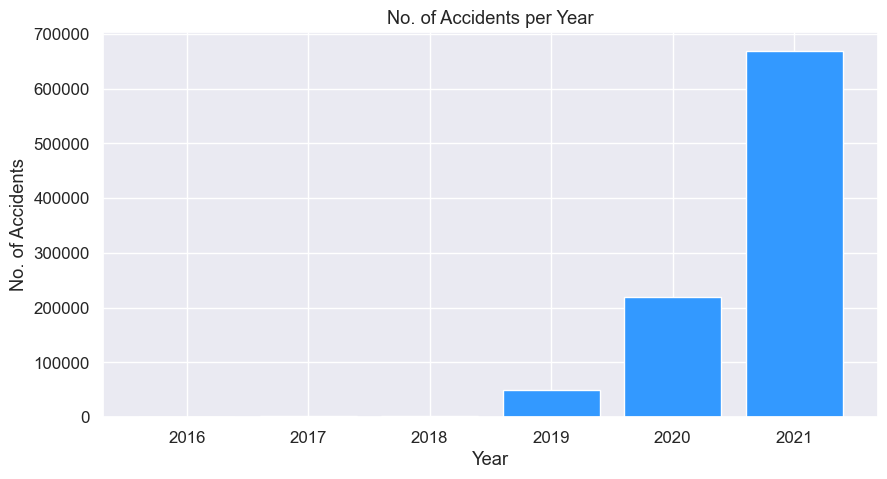

In [76]:
plt.figure(figsize=(10,5))
plt.bar(list(count_sorted.keys()),list(count_sorted.values()), color= ['#3399FF'])
plt.xlabel("Year")
plt.ylabel("No. of Accidents")
plt.title("No. of Accidents per Year")
plt.show()

In [12]:
toBeRemoved = []
for x in range(943318):
    if df.iat[x,2][0:4] != "2020":
        toBeRemoved.append(df.index[x])
df = df.drop(toBeRemoved)
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
246924,A-246925,2,2020-10-13 19:19:34.000000000,2021-07-19 08:00:00.000000000,44.725203,-122.185579,44.734005,-122.166744,1.107,Hazardous tree or vegetation is causing no to ...,...,False,False,False,False,False,False,Night,Night,Day,Day
250560,A-250561,2,2020-10-13 19:19:34,2021-10-01 08:00:00,44.704907,-122.231897,44.697982,-122.217820,0.841,A crash has occurred causing no to minimum del...,...,False,False,False,False,False,False,Night,Night,Day,Day
297791,A-297792,2,2020-10-13 19:19:34,2021-10-01 08:00:00,44.754713,-122.398451,44.756005,-122.391252,0.364,Rock fall has occurred causing no to minimum d...,...,False,False,False,False,False,False,Night,Night,Day,Day
312250,A-312251,2,2020-10-13 19:19:34,2021-10-01 08:00:00,44.701126,-122.074713,44.699826,-122.070964,0.205,A crash has occurred use caution.,...,False,False,False,False,False,False,Night,Night,Day,Day
320955,A-320956,2,2020-10-13 19:19:34.000000000,2021-07-19 08:00:00.000000000,44.725203,-122.185579,44.728013,-122.180288,0.324,Incident on OR-22 EB near MP 48 Drive with cau...,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362639,A-2362640,2,2020-01-06 19:11:00,2020-01-06 20:26:36,35.364949,-118.967601,35.364949,-118.967601,0.000,At CA-58/Bakersfield Tehachapi Hwy - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2362640,A-2362641,2,2020-01-06 19:22:00,2020-01-06 19:53:38,33.775337,-117.992681,33.775337,-117.992681,0.000,At Lampson Ave - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2362643,A-2362644,2,2020-01-06 19:24:00,2020-01-06 20:00:38,34.139057,-118.362045,34.139057,-118.362045,0.000,At Cahuenga Blvd - Accident.,...,False,True,False,False,True,False,Night,Night,Night,Night
2362655,A-2362656,2,2020-01-06 20:49:00,2020-01-06 21:22:38,33.929463,-118.254268,33.929463,-118.254268,0.000,At Central Ave - Accident.,...,False,False,False,False,True,False,Night,Night,Night,Night


Now that we have sufficiently trimmed the number of rows, we may start isolating the desired incidents. As previously mentioned, we have a considerable interest in severity, time, and weather factors. Over the next few cells, we will identify extraneous columns and trim them accordingly.

In [13]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

<h5 align="center"><font color='red'>And the Purge Begins!!!</font></h5>

We have little interest in traffic impact, so we are ok axing End_Lat, End_Lng, and Distance.

We do not require the location now, so leaving Number, Street, Side, City, County, Zipcode, Timezone, and Airport_Code behind works for our purposes.

Additionally, every country entry says "USA" so this column also is redundant.

Now, let's delete the rest of the unnecessary columns since these do not concern us: Weather_TimeStamp, Civil_Twilight, Nautical_Twilight, and Astronomical_Twilight

Finally, these operations leave us with a concise table ready for visualization.

In [14]:
df = df.drop(['End_Lat', 'End_Lng','Distance(mi)', 'Number', 'Street',
       'Side', 'City', 'County','Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp','Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'], axis=1)
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Description,State,Temperature(F),Wind_Chill(F),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
246924,A-246925,2,2020-10-13 19:19:34.000000000,2021-07-19 08:00:00.000000000,44.725203,-122.185579,Hazardous tree or vegetation is causing no to ...,OR,60.0,60.0,...,False,False,False,False,False,False,False,False,False,Night
250560,A-250561,2,2020-10-13 19:19:34,2021-10-01 08:00:00,44.704907,-122.231897,A crash has occurred causing no to minimum del...,OR,60.0,60.0,...,False,False,False,False,False,False,False,False,False,Night
297791,A-297792,2,2020-10-13 19:19:34,2021-10-01 08:00:00,44.754713,-122.398451,Rock fall has occurred causing no to minimum d...,OR,60.0,60.0,...,False,False,False,False,False,False,False,False,False,Night
312250,A-312251,2,2020-10-13 19:19:34,2021-10-01 08:00:00,44.701126,-122.074713,A crash has occurred use caution.,OR,60.0,60.0,...,False,False,False,False,False,False,False,False,False,Night
320955,A-320956,2,2020-10-13 19:19:34.000000000,2021-07-19 08:00:00.000000000,44.725203,-122.185579,Incident on OR-22 EB near MP 48 Drive with cau...,OR,60.0,60.0,...,False,False,False,False,False,False,False,False,False,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362639,A-2362640,2,2020-01-06 19:11:00,2020-01-06 20:26:36,35.364949,-118.967601,At CA-58/Bakersfield Tehachapi Hwy - Accident.,CA,43.0,43.0,...,False,False,False,False,False,False,False,False,False,Night
2362640,A-2362641,2,2020-01-06 19:22:00,2020-01-06 19:53:38,33.775337,-117.992681,At Lampson Ave - Accident.,CA,67.0,67.0,...,False,False,False,False,False,False,False,False,False,Night
2362643,A-2362644,2,2020-01-06 19:24:00,2020-01-06 20:00:38,34.139057,-118.362045,At Cahuenga Blvd - Accident.,CA,60.0,60.0,...,False,False,True,False,True,False,False,True,False,Night
2362655,A-2362656,2,2020-01-06 20:49:00,2020-01-06 21:22:38,33.929463,-118.254268,At Central Ave - Accident.,CA,62.0,62.0,...,False,False,False,False,False,False,False,True,False,Night


***

**<h2 align="center"><font color='1874BD'>Analysis and Visualization</font></h2>**

This section revolves around understanding the data using graphical analysis. Additionally, it attempts to perform a brief statistical analysis that we explore further in the interpretation section. 

Seaborn's wonderful platform provides many robust tools to visualize this data. More introductory information about the seaborn library can be found [here](https://seaborn.pydata.org/tutorial/introduction)

We start by comparing accident severity before we move to weather factors. Each of these plots provides insight into our essential questions regarding the safety of drivers on US roads. 


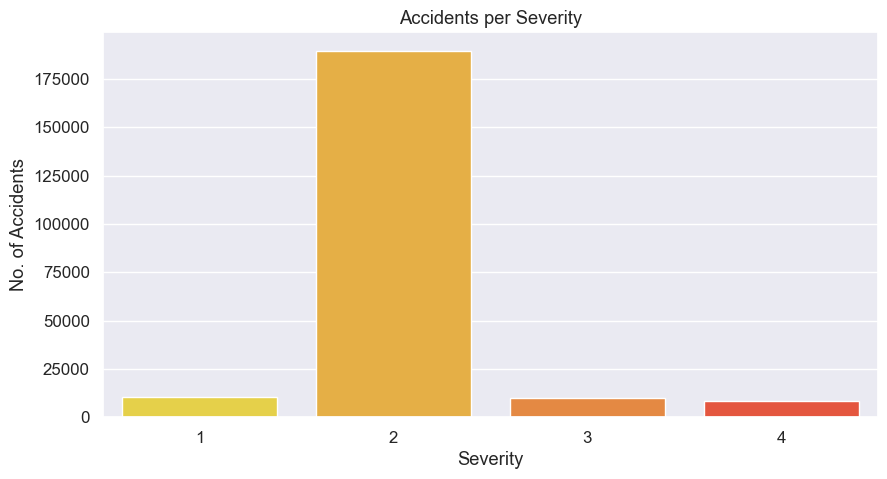

In [70]:
plt.figure(figsize=(10,5))
sev = sns.countplot(data= df, x= 'Severity', 
                    palette= ['#ffe330', '#ffb72c', '#ff8628', '#ff4224'])
sev.set(ylabel= "No. of Accidents", title= "Accidents per Severity")
plt.show()

Our database scales accident severity from 1-4, increasing based on its traffic impact. Here, we assume that greater severity also correlates to more significant injury to drivers. Based on the graph, most incidents have relatively mild danger, but we want to identify the weather factors that may impact this data and the potential risks. 


Starting with Temperature's Effect on Accident Severity:

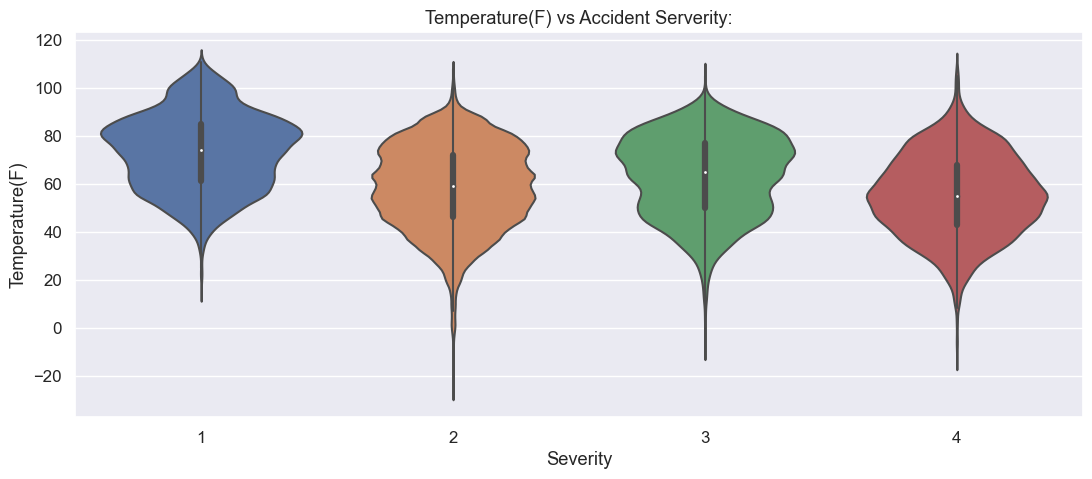

In [69]:
plt.figure(figsize=(13,5))
sns.violinplot(x ="Severity", y = "Temperature(F)", data = df)
plt.title("Temperature(F) vs Accident Serverity:")
plt.show()

Initially, it appears as though temperature varies extensively in regards to severity. Therefore, temperature may not aptly account for an increase in driving risks. 

Visibility vs Accident Serverity:

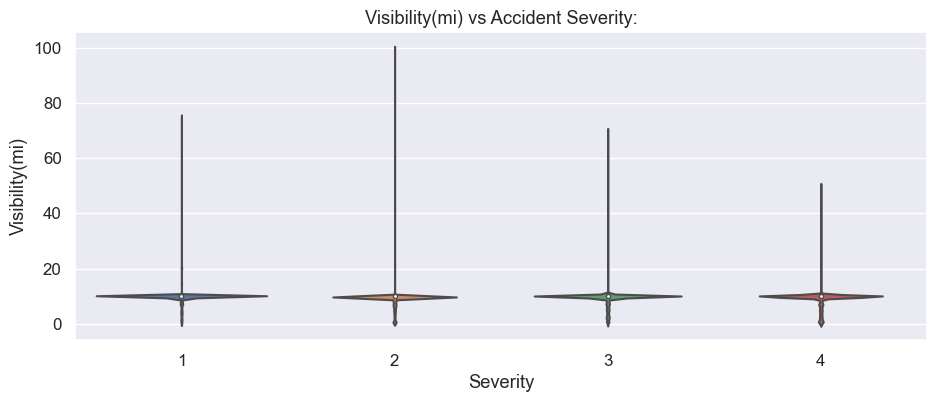

In [75]:
plt.figure(figsize=(11,4))
sns.violinplot(x ="Severity", y = "Visibility(mi)", data = df)
plt.title("Visibility(mi) vs Accident Severity:")
plt.show()

Here, the data has outliers, but it also focuses the bulk of the incidents below the 20-mile visibility threshold. It appears visibility may be a much better risk marker, which makes sense. We want to focus on this minimal range, so let's probe a little deeper into the below 20 range. First, we remove outliers, classified as anything greater than 4 standard deviations away from the mean.

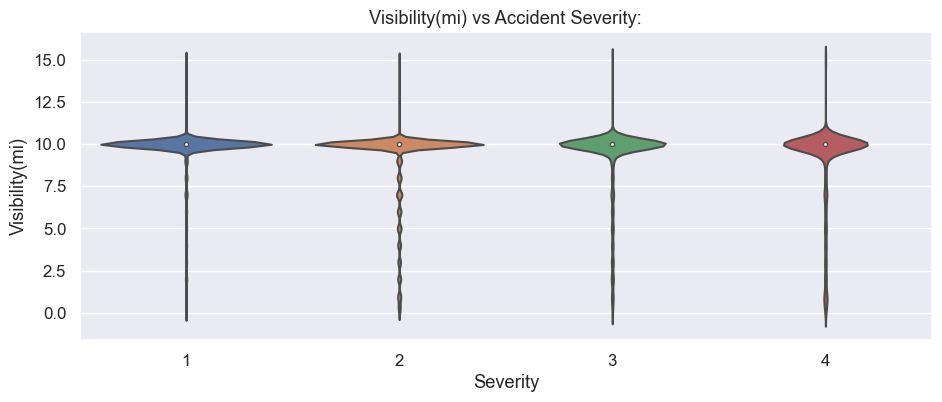

In [74]:
# Code to remove outliers more than four std devs from the mean
mean_vis = df['Visibility(mi)'].mean()
std_vis = df['Visibility(mi)'].std()
clean_vis = df[(df['Visibility(mi)'] <= mean_vis + (4*std_vis))]
clean_vis = clean_vis[(clean_vis['Visibility(mi)'] >= mean_vis - (4 * std_vis))]

# Plot cleaned data
plt.figure(figsize=(11,4))
sns.violinplot(x ="Severity", y = "Visibility(mi)", data = clean_vis)
plt.title("Visibility(mi) vs Accident Severity:")
plt.show()

Interestingly, the data remains very compact. Low visibility obviously inhibits driving ability, but why does the graph reflect high variation? Very low visibility highly impacts severity; however, these conditions are much rarer than that 10-mile sweet spot. On the flip side, crashes in low visbility may also be rare, leading to this bulk of data in one area.

Now let's check out Wind Speed vs. Severity:

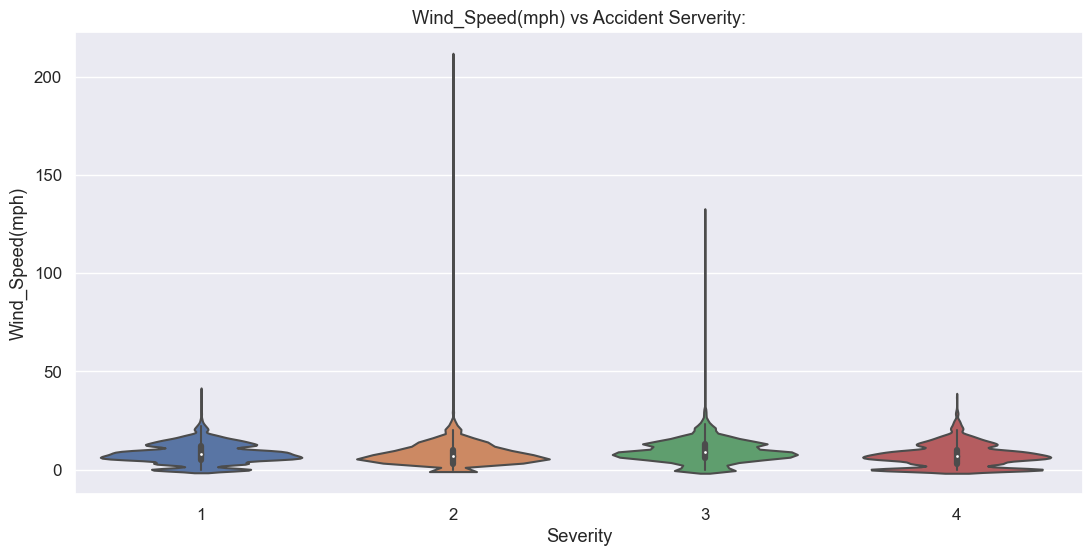

In [73]:
plt.figure(figsize=(13,6))
sns.violinplot(x ="Severity", y = "Wind_Speed(mph)", data = df)
plt.title("Wind_Speed(mph) vs Accident Serverity:")
plt.show()

Once again, the data centers below a certain threshold, this time the 50mph mark, so we isolate the chart to that range and perform the same outlier-removing processes. 

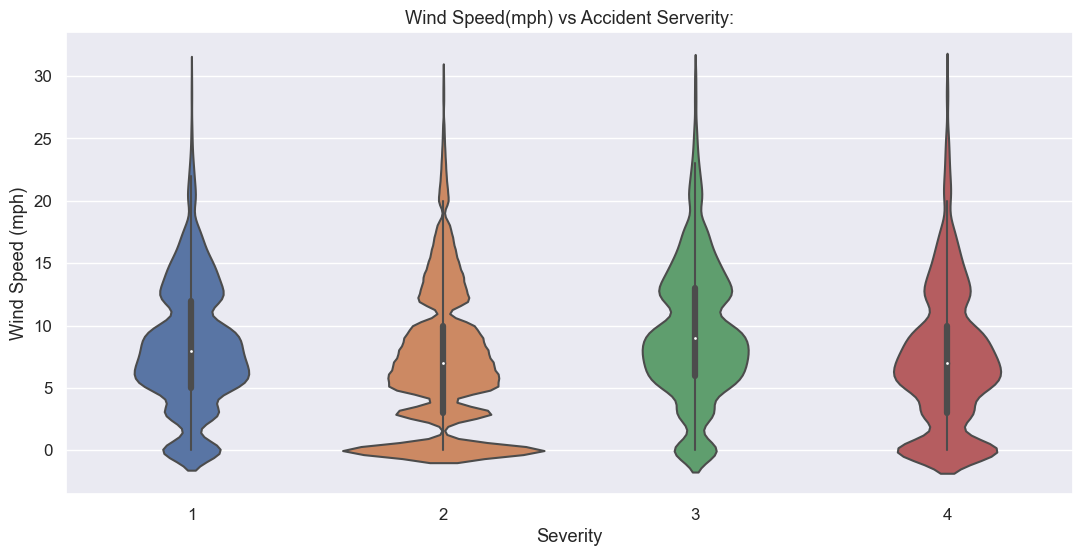

In [72]:
# Code to remove outliers more than 4 standard devs. from mean
mean_wind = df['Wind_Speed(mph)'].mean()
std_wind = df['Wind_Speed(mph)'].std()
clean_wind = df[(df['Wind_Speed(mph)'] <= mean_wind + (4*std_wind))]
clean_wind = clean_wind[(clean_wind['Wind_Speed(mph)'] >= mean_wind - (4 * std_wind))]

# Plot new data
plt.figure(figsize=(13,6))
sns.violinplot(x ="Severity", y = "Wind_Speed(mph)", data = clean_wind)
plt.title("Wind Speed(mph) vs Accident Serverity:")
plt.ylabel("Wind Speed (mph)")
plt.show()

Wind speed may not have a high correlation with severity due to its high variability

Now let's switch to the overall weather condition (i.e., cloudy, clear, etc.) Since these have non-numerical fields, we first isolate the data by weather conditions, checking the sheer number of respective accidents. 

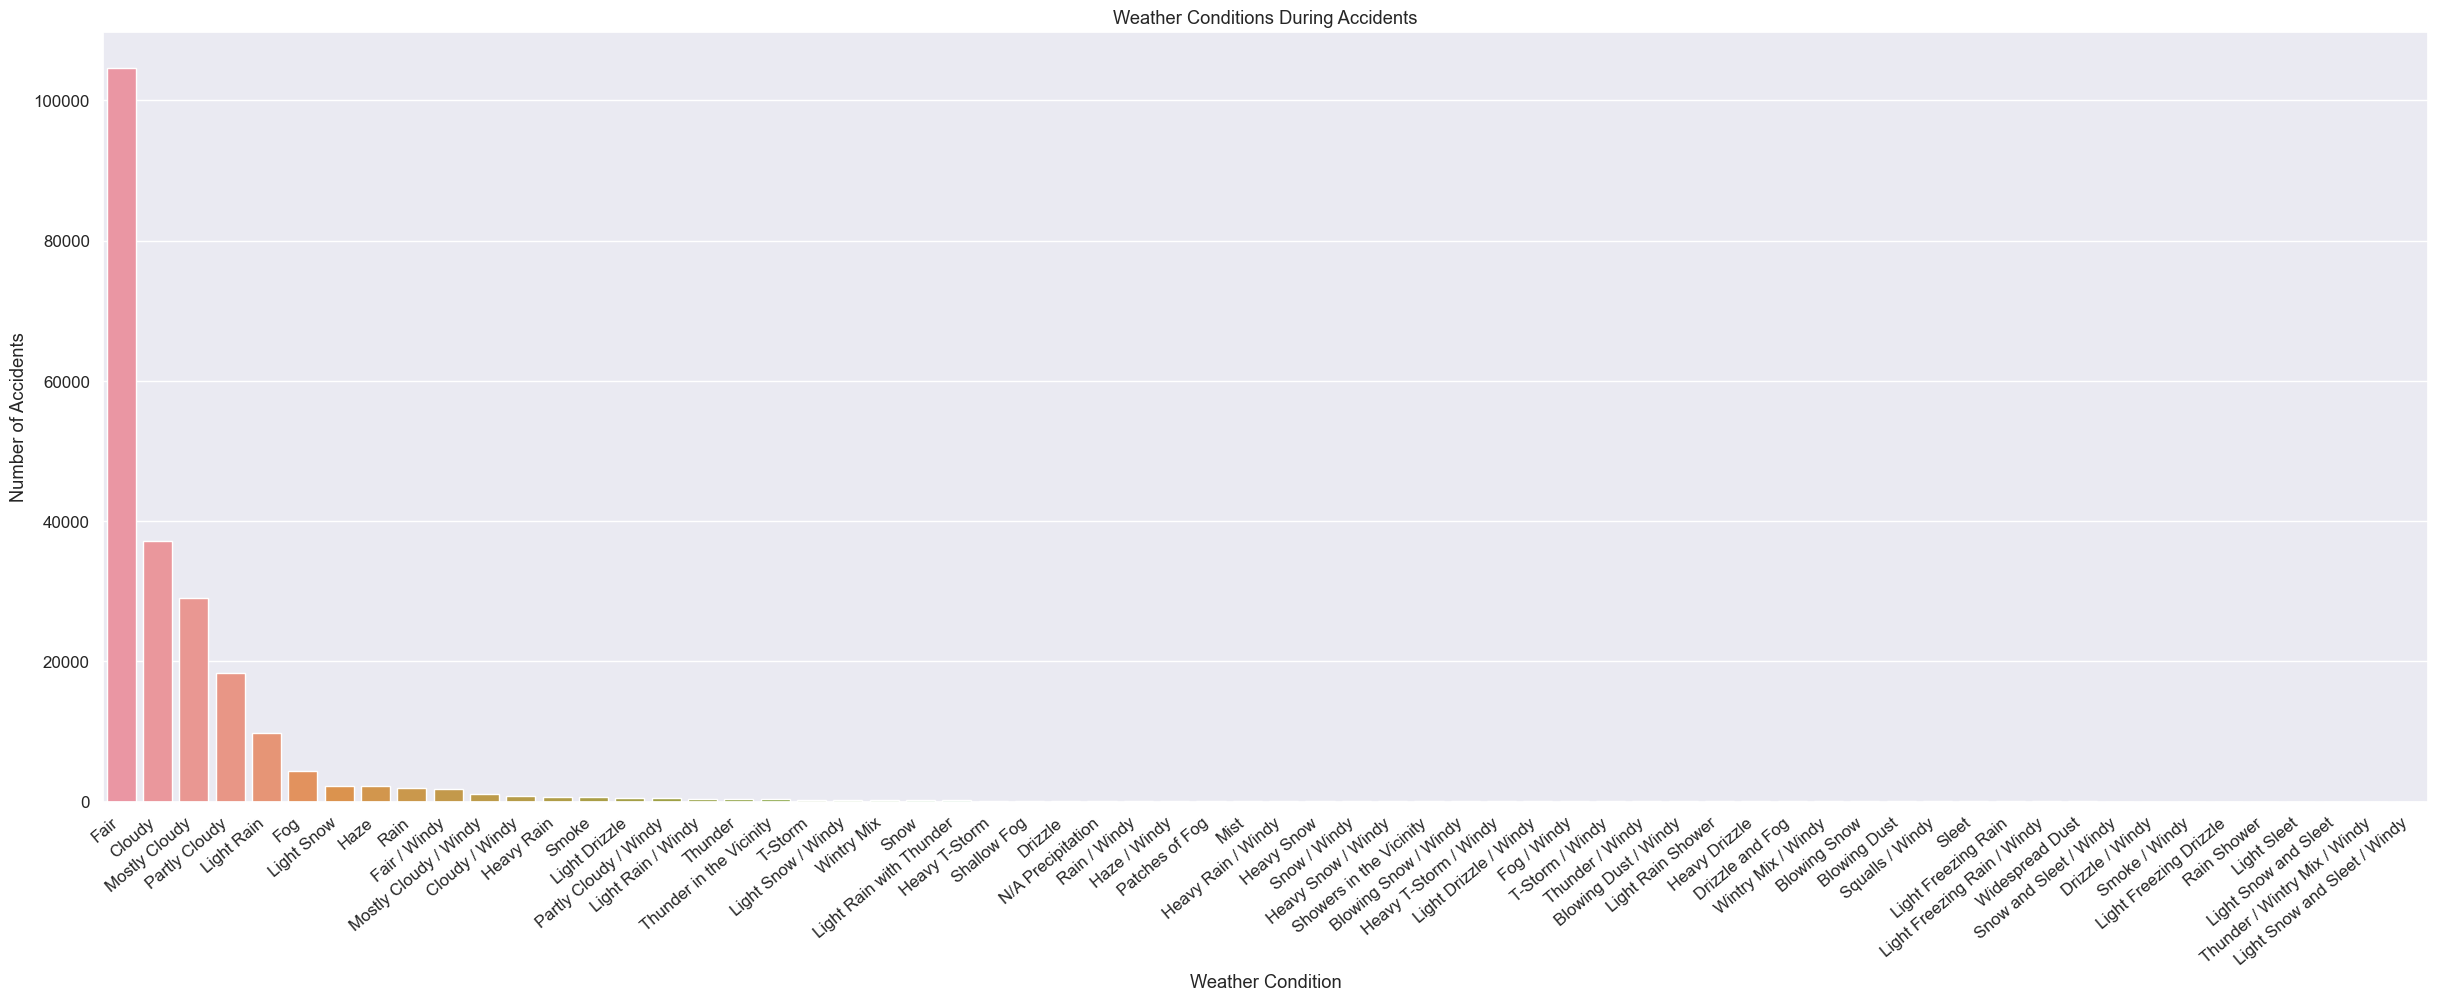

In [71]:
plt.figure(figsize = (30, 10))
sns.set(font_scale = 1.1)
accidentplot = sns.countplot(data= df, x= 'Weather_Condition', 
                             order= df['Weather_Condition'].value_counts().index)
accidentplot.set_xticklabels(accidentplot.get_xticklabels(), rotation=40, ha="right")
accidentplot.set_title('Weather Conditions During Accidents')
accidentplot.set(xlabel= 'Weather Condition', ylabel= 'Number of Accidents')
plt.show()

Instead of trying to make sense of the cluttered x-axis, we noticed the majority of incidents grouped between just a few weather conditions. In response, we isolated these specific weather conditions, naming the six states with the highest number of accidents. Furthermore, we acknowledge that these are a few of the most common overall weather conditions. This occurs because if a person drives every day, they will be more likely to encounter similar weather conditions over and over again. 

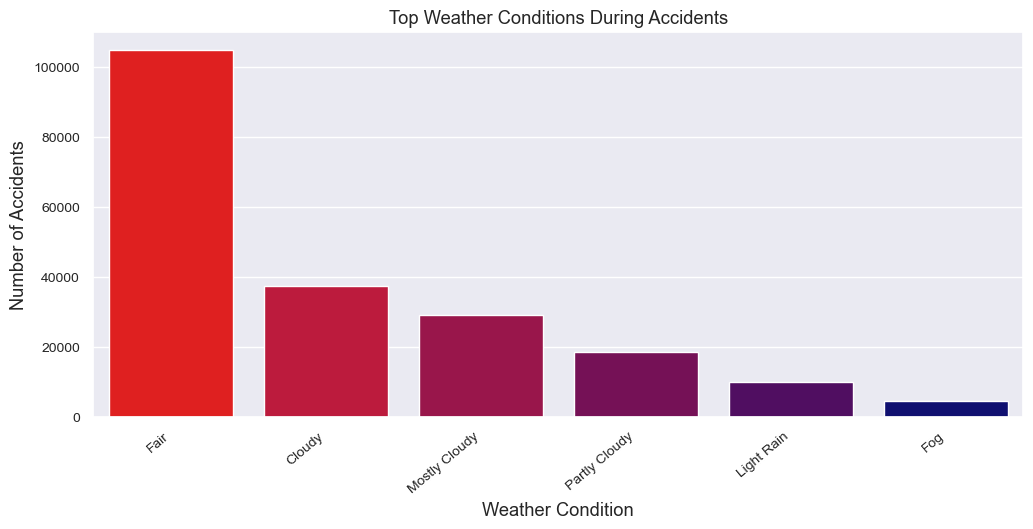

In [22]:
count = {}
for x in range(219585):
    count[df.iat[x,12]] = count.get(df.iat[x,12],0)+1
# Copied directly from count variable, showing largest categories
updatedCount = {"Cloudy":37293, "Fair":104828, "Partly Cloudy":18402, 
                "Fog":4321, "Light Rain":9825, "Mostly Cloudy":29139}

topsix = pd.DataFrame(list(updatedCount.items()), columns=['Weather', 'Count'])
topsix = topsix.sort_values('Count', ascending=False)

plt.figure(figsize=(12,5))
six_bar = sns.barplot(x= 'Weather', y= 'Count', data= topsix, 
                      palette= ['#ff0000', '#d7002e', '#af0047', '#86005c', 
                                '#58006f', '#000080'])
six_bar.set_xticklabels(six_bar.get_xticklabels(), rotation=40, ha="right")
six_bar.set_title("Top Weather Conditions During Accidents")
six_bar.set(xlabel= 'Weather Condition', ylabel= "Number of Accidents")
six_bar.tick_params(axis='both', which='major', labelsize=10)


Weather's impact on accidents remains dubious. It varies highly because of frequency, 

Lets see if the time of day has a big impact on accidents

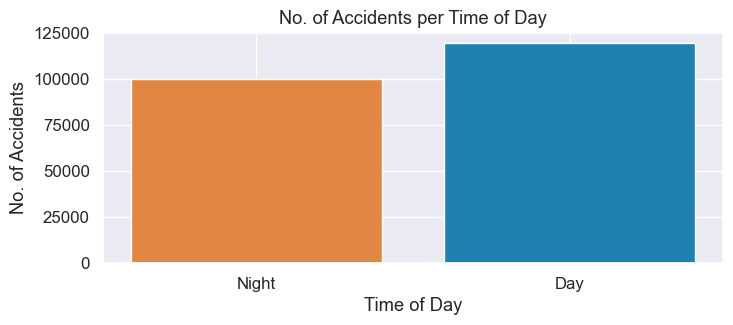

In [23]:
# Count number of accidents corresponding to day or night
count = {}
for x in range(219585):
    count[df.iat[x,30]] = count.get(df.iat[x,30],0)+1

plt.figure(figsize=(8,3))
plt.bar(list(count.keys()),list(count.values()), color  = ['#e28743', "#1e81b0"])
plt.xlabel("Time of Day")
plt.ylabel("No. of Accidents")
plt.title("No. of Accidents per Time of Day")
plt.show()

Interestingly, the number of accidents stays relatively consistent based on the time of day. This fact felt counterintuitive to our beliefs, considering that visibility should decrease at night and people should be more tired, so we decided to delve further. Maybe accidents do not correspond to the general setting, but rather the specific hour. 

In [24]:
# Set cols to datetime
df["Start_Time"] =  pd.to_datetime(df["Start_Time"])
df["End_Time"] =  pd.to_datetime(df["End_Time"])

In [25]:
# Count accidents per hour
count = {}
for x in range(219585):
    count[df.iat[x,2].hour] = count.get(df.iat[x,2].hour,0)+1

sorted_count = dict(sorted(count.items()))
tod = pd.DataFrame.from_dict(sorted_count, orient='index', columns=['Accidents'])

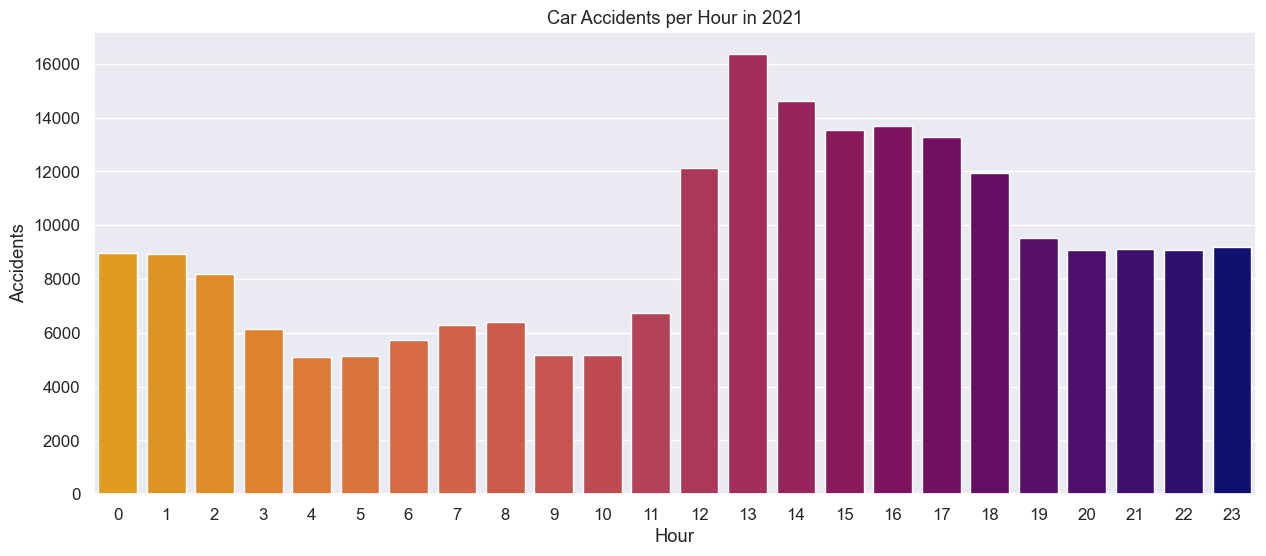

In [26]:
plt.figure(figsize=(15,6))
tod_plot = sns.barplot(x= tod.index.values, y= 'Accidents', data= tod, 
                       palette= ['#ffa500', '#ff9902', '#fe8d09', '#fc8113', '#f9761b', 
                                 '#f46b23', '#ef602a', '#e85531', '#e14b37', '#da413d', 
                                 '#d13743', '#c82e4a', '#bf2550', '#b41b56', '#a9125c', 
                                 '#9e0761', '#910067', '#83006d', '#730072', '#640077', 
                                 '#53007b', '#40007e', '#2a007f', '#000080'])
tod_plot.set(title= "Car Accidents per Hour in 2021", ylabel= "Accidents", xlabel= "Hour")
plt.show()

It seems most accidents occur between noon and 6pm. There is a simple explanation for this: these are the times where most people drive. However, can we do the same while isolating the severity variable? 

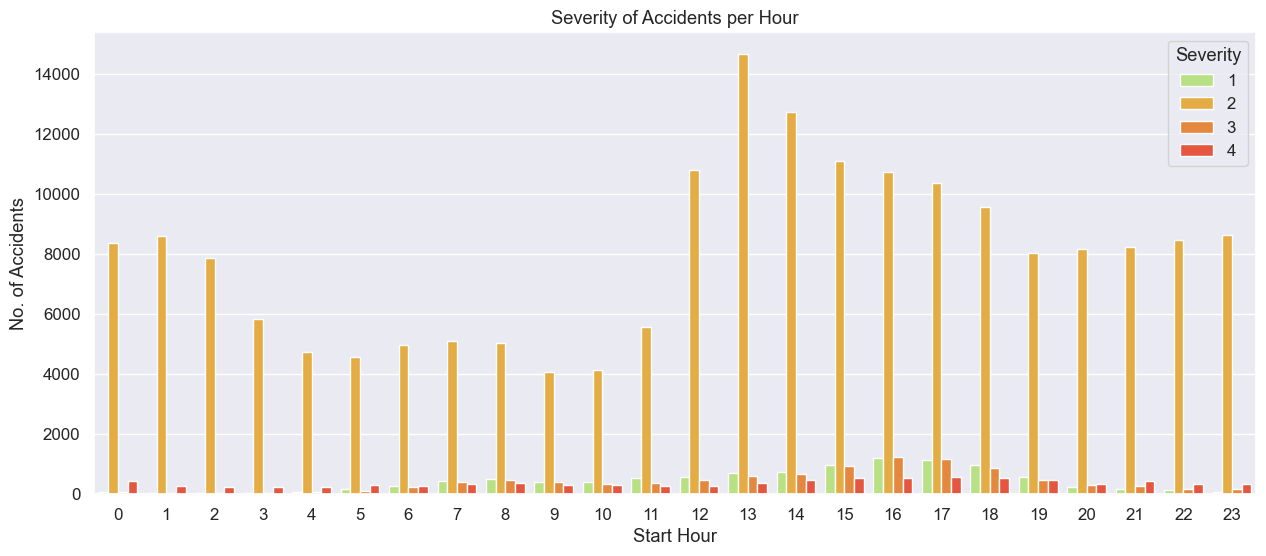

In [27]:
# Add cols. for start and end hour for each var. This will be useful later.
df['Start_Hour'] = df['Start_Time'].apply(lambda x: x.hour)
df['End_Hour'] = df['End_Time'].apply(lambda x: x.hour)
df = df.dropna()
df.Start_Hour.astype(int)
df.End_Hour.astype(int)

plt.figure(figsize=(15,6))
tod_sev_plot = sns.countplot(x= 'Start_Hour', hue= 'Severity', data= df, 
                                palette= ['#b9f174', '#ffb42a', '#ff8424', '#ff4224'])
tod_sev_plot.set(xlabel= "Start Hour", ylabel= "No. of Accidents", 
                        title= "Severity of Accidents per Hour")
plt.show()

This may not seem significant, but there's a trend starting to emerge. Do you see it? Let's take a closer look at the proportion of severe accidents (3 or 4) based on the hour. 

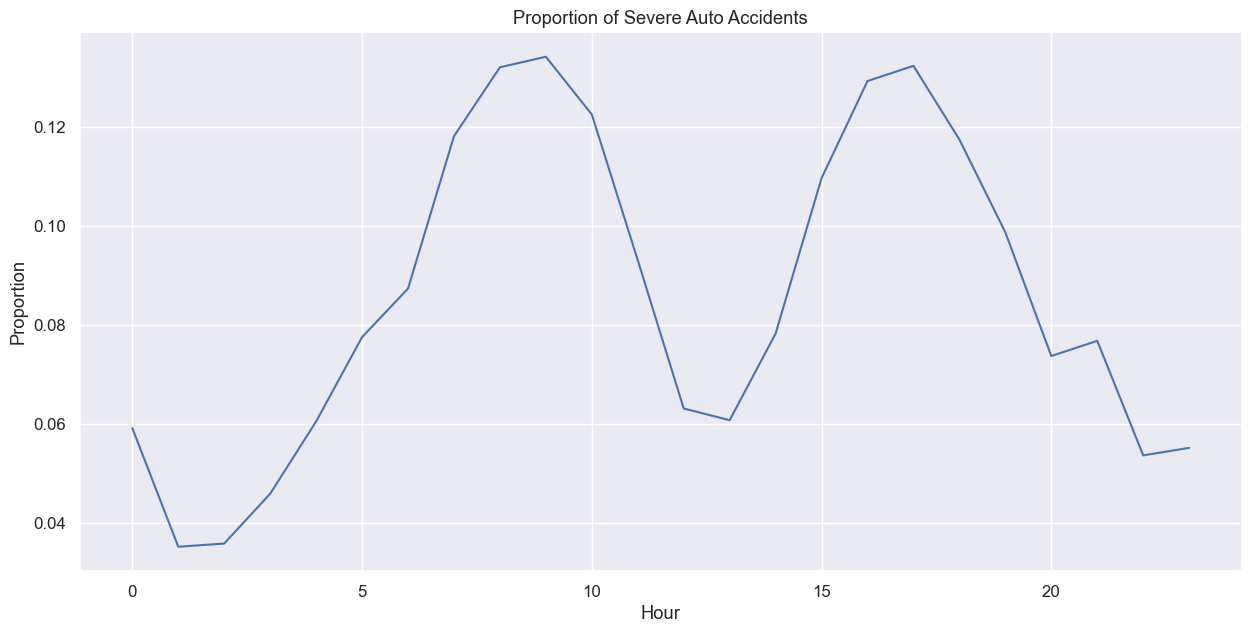

In [28]:
# Find severe (3 or 4) level accidents per hour
severe_arr = []
for i in range(24):
    temp = df[df['Start_Hour'] == i]
    total = len(temp.index)
    sev = len(temp[temp['Severity'] >= 3])
    severe_arr.append([sev, total, sev/total])
severe_df= pd.DataFrame(data= severe_arr, columns= ['Severe', 'Total', 'Proportion'])

# Plot data
plt.figure(figsize=(15,7))
x = sns.lineplot(data= severe_df, x= severe_df.index.values, y= 'Proportion')
x.set(xlabel= 'Hour', title= 'Proportion of Severe Auto Accidents')
plt.show()

Somewhat expectedly, the most severe accidents take place during rush hour, but the data also has a local peak near midnight. Tiredness may be the main contribitor to this jump, emphasizing its effect on driving. **Do not drive tired!**

Lastly, we wanted to identify the locations with the most severe accidents. The interactive map below aims to graphically highlight the areas of the United States expriencing the most severe auto accidents. 

In [29]:
# accident_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4.45, tiles='Stamen Terrain', prefer_canvas = True,zoom_control=False,
#                scrollWheelZoom=False, dragging=False)
# #Used to set color of severity of accident on map
# def color_manager(severity):
#     if severity  == 1:
#         return 'lightgreen'
#     if severity == 2:
#         return 'yellow'
#     if severity == 3:
#         return 'orange'
#     else:
#         return 'red'
        
# for x in range(219585):
#     folium.CircleMarker(
#         location=[df.iat[x,3],df.iat[x,4]],
#         radius=2,
#         fill = True,
#         fill_opacity = 0.3, # Setting the inner circle opacity
#         color = color_manager(df.iat[x,1]),
#         opacity = 0.4,
#         bubling_mouse_events = True,
#         popup= [df.iat[x,5]] # Setting up an info pop up with Event type as it's info
#     ).add_to(accident_map)
# accident_map

Most accidents occur on the East and West coasts, with the more severe accidents occurring on the East coast. Interestingly, the West Coast owns the most vehicles, which should lead to the most accidents, but other factors, such as visibility due to superior West Coast weather, result in the higher East Coast severity. The Midwest has a decent amount of accidents; however, they are very dispersed and not concentrated, unlike the coasts. This scarcity is likely due to fewer people on the roads. 

***

**<h2 align="center"><font color='1874BD'>Machine Learning Models</font></h2>**

Let's see if a model can predict the severity of an accident. Unfortunately, the dataset measures the severity of an accident from 1-4, which is not conducive to a machine learning model. So instead, we estimate the severity of an accident based on how long the traffic was affected. We are aware that the time it takes for traffic to clear after an accident is based on several factors. However, this is the best feature from the data to quantify an accident. We first chose a standard [Ordinary Least Squares Linear Regression model.](https://ai.plainenglish.io/explaining-least-squares-a911cca0b41)

Admittedly, this does not provide the best fit for our data due to extreme outliers and variability, a feature we've tried to eliminate later by using a RANSAC model.

In [30]:
def linregML(X,Y, dep, ind, title):
    # Split data into testing and training 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

    # Create regression
    regr = linear_model.LinearRegression()

    # Fit data by training model
    regr.fit(X_train, y_train)

    print('Regression Score: %.8f' % regr.score(X_test, y_test))

    # Make predictions using the test group
    y_pred = regr.predict(X_test)
    
    plt.figure(figsize= (15,7))
    plt.scatter(X_test, y_test, color ='b', s= 0.5)
    plt.plot(X_test, y_pred, color ='k')
    plt.ylim((0,500))

    plt.title(title)
    plt.xlabel(dep)
    plt.ylabel(ind)

    plt.show()

**Random Sample Consensus (RANSAC)**

To provide more accurate estimates of the coefficients and better predict the dependent variable, we added a  [Random Sample Consensus (RANSAC)](https://www.baeldung.com/cs/ransac) algorithm to identify and remove outliers from the dataset before fitting the linear regression model. The basic idea behind RANSAC is to randomly sample a subset of the data points and fit a model to that subset. Then, we test the remaining data points against the model and consider those that fall within a certain threshold of the model inliers, while those that fall outside the threshold are considered outliers. The process is repeated multiple times to obtain the best model that fits the inliers, and the outliers are discarded.

In [31]:
def RANSAClinregML(X,Y, dep, ind, title):
    ransac = linear_model.RANSACRegressor()
    ransac.fit(X, Y)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)

    Xin = X[inlier_mask]
    Yin = Y[inlier_mask]

    # split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(Xin, Yin, test_size=0.25)
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)

    print('Regression Score: %.8f' % regr.score(X_test, y_test))

    plt.figure(figsize= (15,7))
    y_pred = regr.predict(X_test)
    plt.scatter(X_test, y_test, color ='b', s= 0.5)
    plt.plot(X_test, y_pred, color ='k')

    plt.title(title)
    plt.xlabel(dep)
    plt.ylabel(ind)

    plt.show()

**Logistic Regression**

Unlike a linear regression model, a logistic regression model has the advantage of having curves in the regression line. Therefore it can follow and predict data more closely when there isn't a linear relationship between the two variables. In addition, while Ordinary Least Squares (OLS) is a distance-minimizing approximation method, the logistic model uses a maximum likelihood estimation method. It tries to maximize the probability of observing the dataset given a model and its parameters. However, this doesn't work well with our dataset because our data is continuous, and the log model works best with categorical data. It works much better when we run the logistic regression model with the "Severity" data, which only has four values.

In [32]:
def logML(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=16) #random state to sample the data randomly
    logreg = LogisticRegression(random_state=16) #same here

    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)

    #could add a solver here if the penalty is Type 2 -> lbfgs & saga/sag -> type 1 error. 
    # depends on the matrix down below

    #Can also add a ROC curve to see the rate of false positives and false negatives

    #creating a heatmap confusion matrix to visually represent the logistic regression

    heat_matrix = metrics.confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots()

    sns.heatmap(pd.DataFrame(heat_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.plot()

    #printint the metrics associated to heatmaps for further analysis
    print('Classification Accuracy: %.2f', (heat_matrix[0,0] + heat_matrix[0,1])/(heat_matrix[0,0] +heat_matrix[0,1] +heat_matrix[1,0] +heat_matrix[1,1]))

    precision = heat_matrix[1,1]/(heat_matrix[1,1] + heat_matrix[0,1])
    recall = heat_matrix[1,1]/(heat_matrix[1,1] + heat_matrix[1,0])
    print('Precision: %.2f', precision)
    print('Recall: %.2f', recall)
    print('F1 Score: %.2f', (2*precision*recall)/(precision + recall))

In [34]:
# Using duration instead of severity as mentioned in the OLS explanation
df['Duration'] = df.apply(
    lambda x: pd.Timedelta(x['End_Time']-x['Start_Time']).total_seconds() / 60, axis=1)

Regression Score: 0.00006394


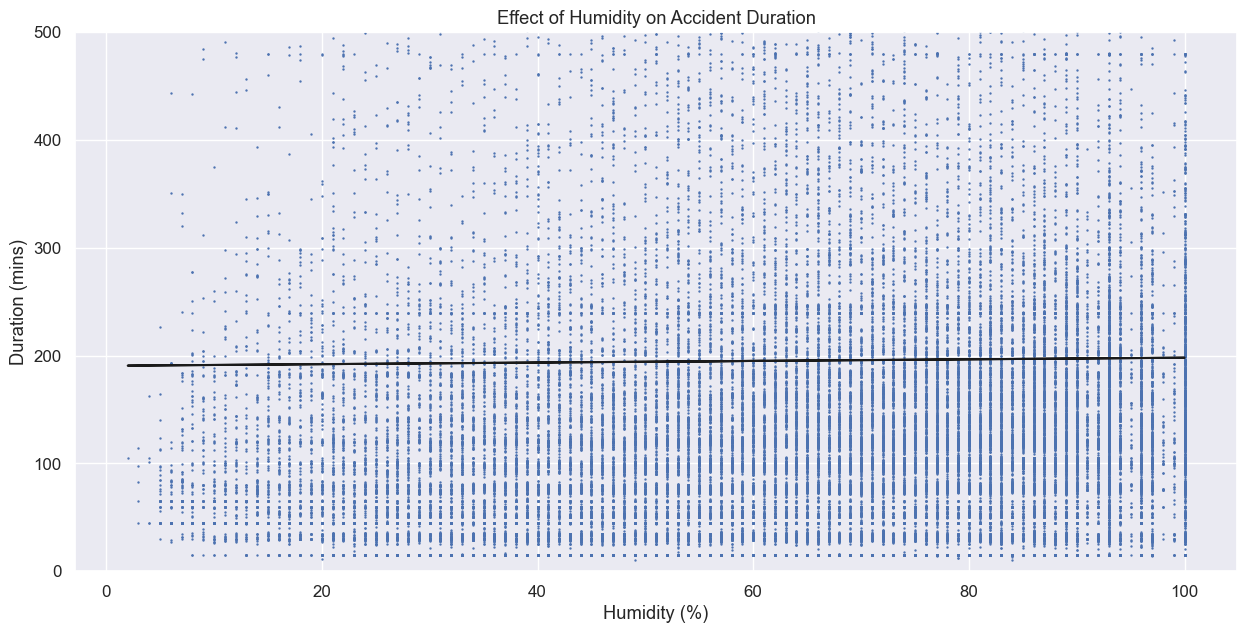

In [63]:
df['Duration'] = pd.DataFrame(df['Duration'])
df = df[df['Duration'] <= 2880]
df = df[df['Duration'] > 10]

# Now, apply to models
x = df[['Humidity(%)']]
y = df[['Duration']]
linregML(x,y, 'Humidity (%)', 'Duration (mins)', 'Effect of Humidity on Accident Duration')

Regression Score: 0.22671241


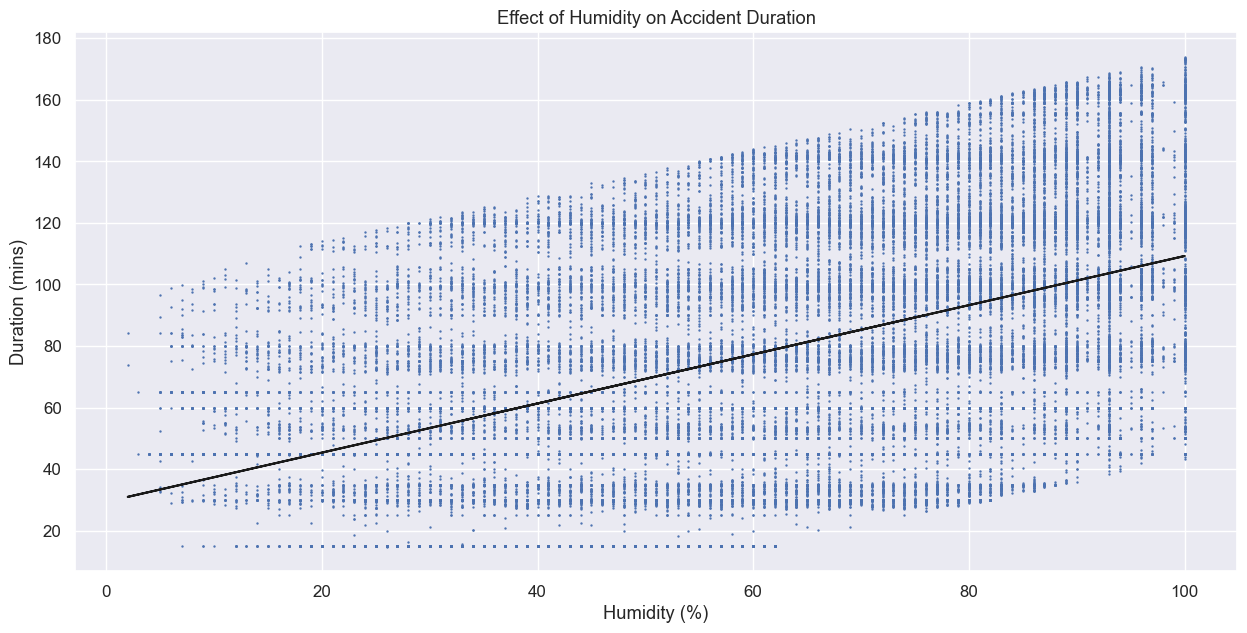

In [84]:
x = df[['Humidity(%)']]
y = df[['Duration']]
RANSAClinregML(x,y, 'Humidity (%)', 'Duration (mins)', 
               'Effect of Humidity on Accident Duration')

Increased humidity also increases traffic duration, likely because of slickness on the roads. 

Regression Score: 0.01174414


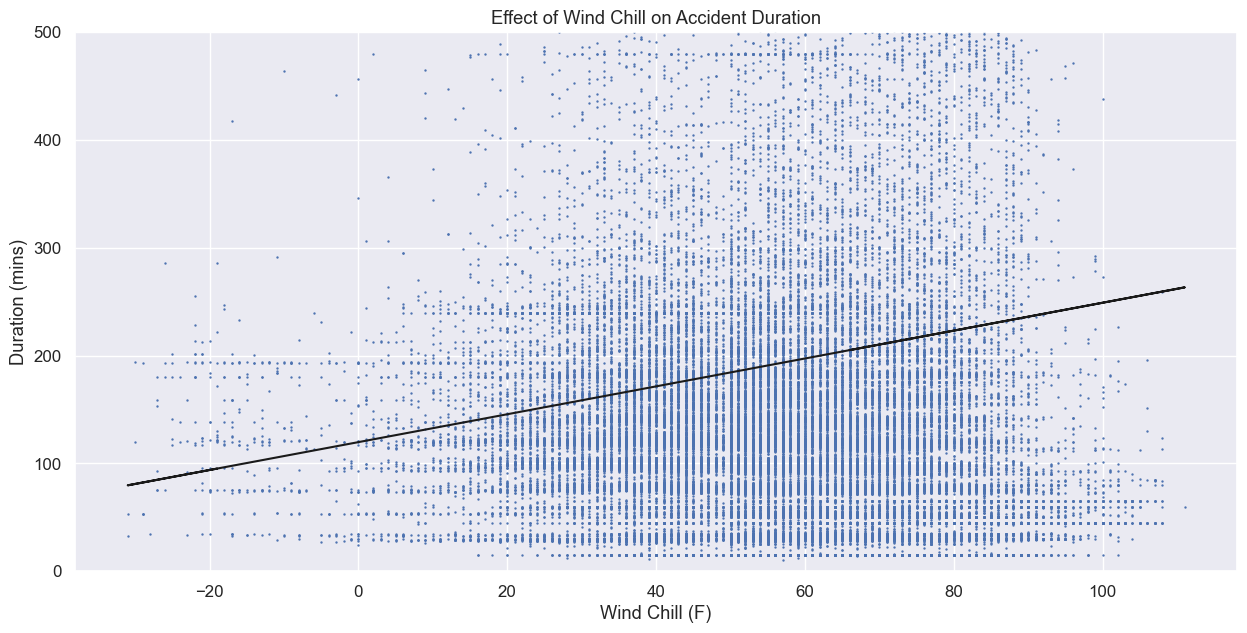

In [64]:
x = df[['Wind_Chill(F)']]
y = df[['Duration']]
linregML(x,y, 'Wind Chill (F)', 'Duration (mins)', 
         'Effect of Wind Chill on Accident Duration')

Regression Score: 0.09408923


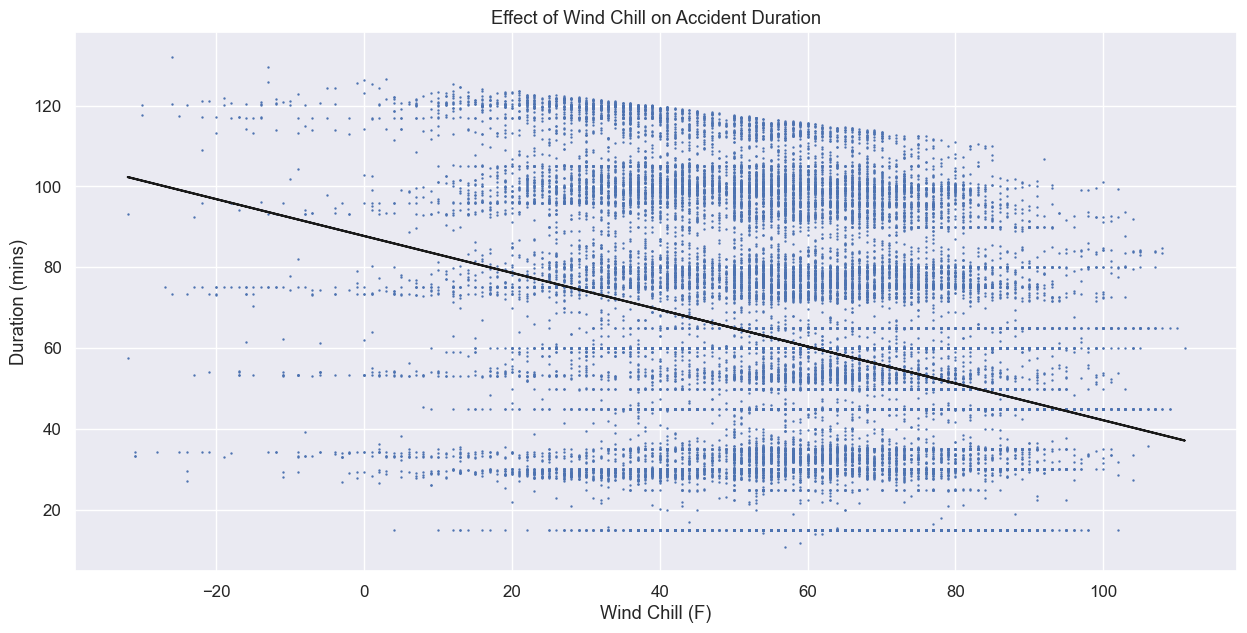

In [94]:
x = df[['Wind_Chill(F)']]
y = df[['Duration']]
RANSAClinregML(x,y, 'Wind Chill (F)', 'Duration (mins)', 
               'Effect of Wind Chill on Accident Duration')

Regression Score: 0.00015586


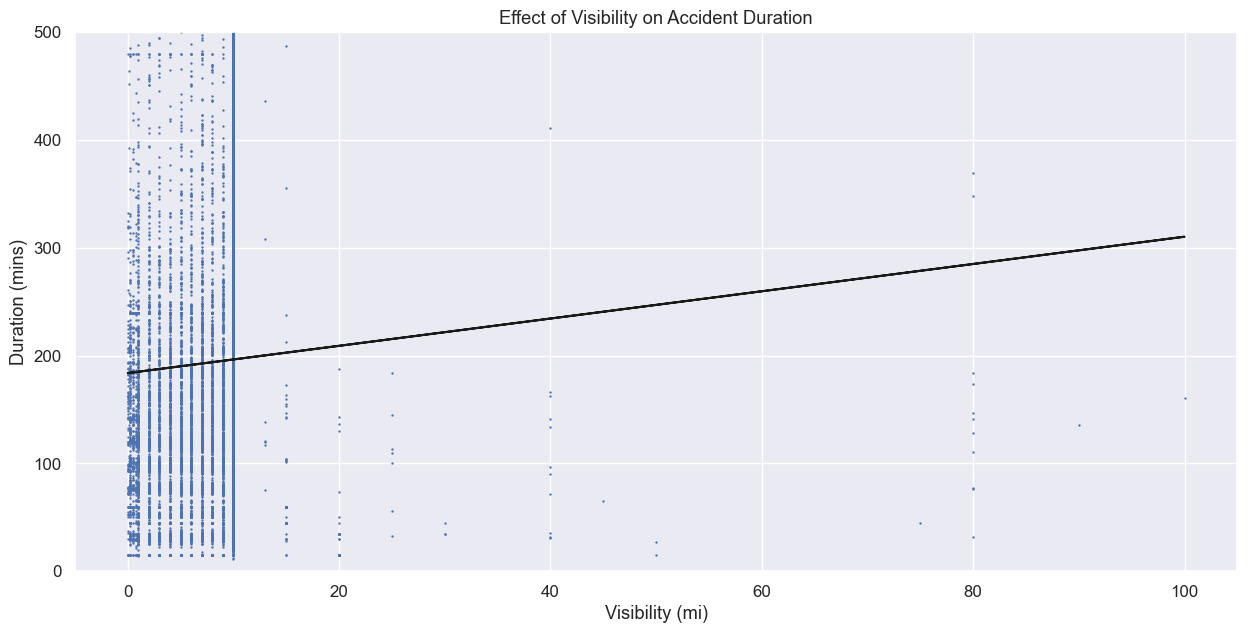

In [51]:
x = df[['Visibility(mi)']]
y = df[['Duration']]
linregML(x,y, 'Visibility (mi)', 'Duration (mins)', 
         'Effect of Visibility on Accident Duration')

Regression Score: 0.00294417


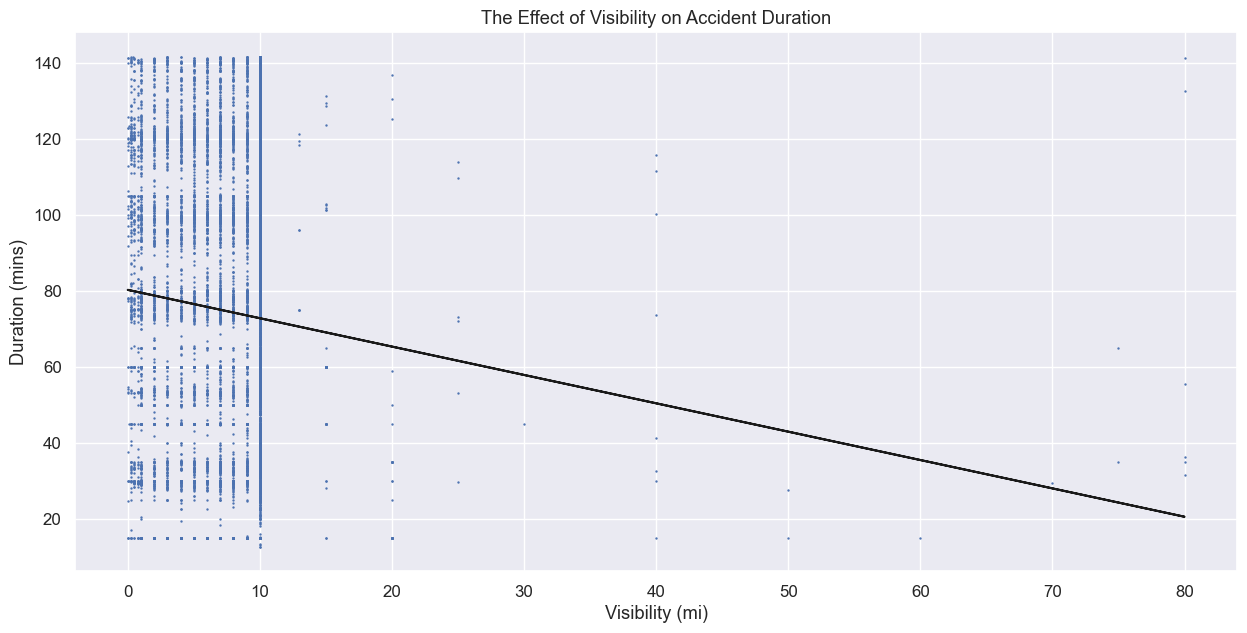

In [95]:
x = df[['Visibility(mi)']]
y = df[['Duration']]
RANSAClinregML(x,y, 'Visibility (mi)', 'Duration (mins)', 
               'The Effect of Visibility on Accident Duration')

Regression Score: -0.00008211


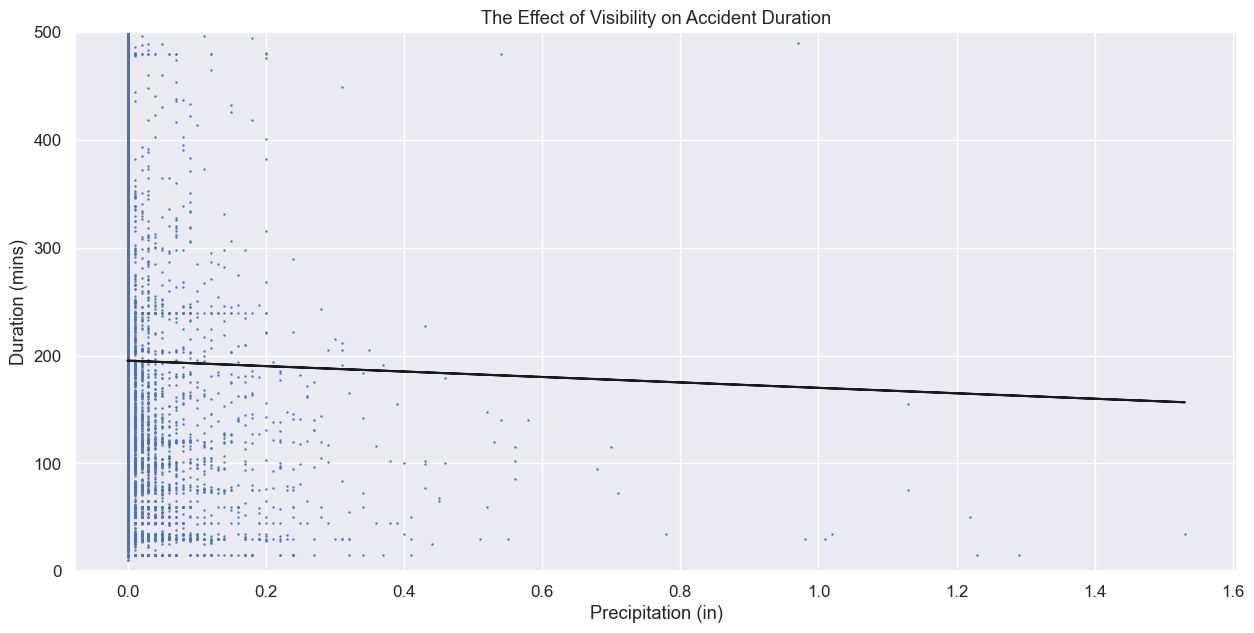

In [61]:
x = df[['Precipitation(in)']]
y = df[['Duration']]
linregML(x,y, 'Precipitation (in)', 'Duration (mins)', 
         'The Effect of Visibility on Accident Duration')

Regression Score: 0.00077705


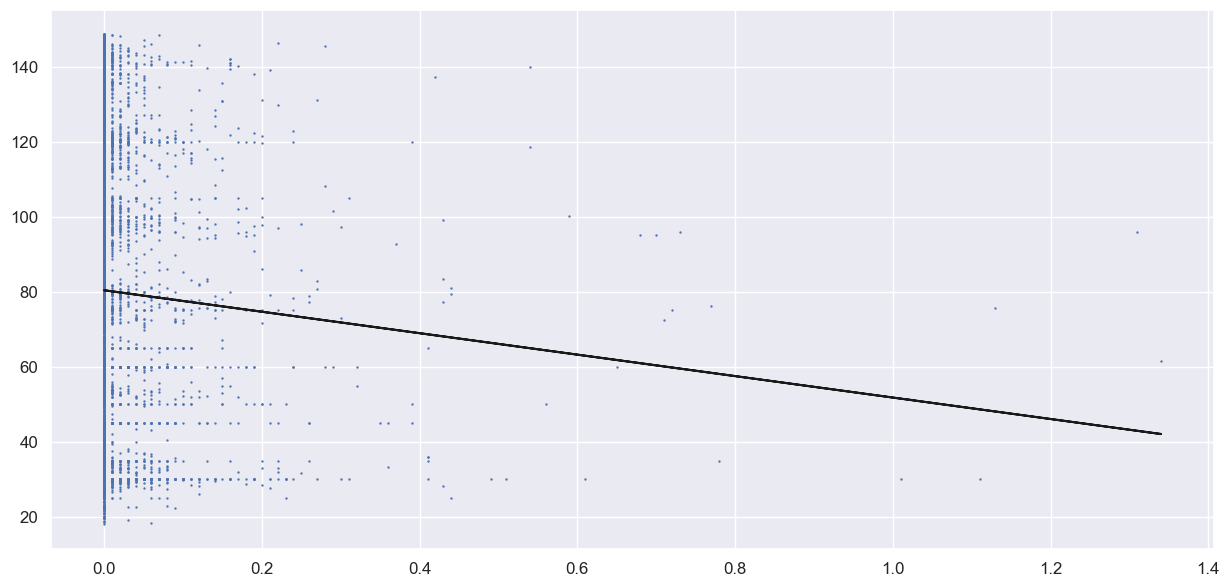

In [ ]:
x = df[['Precipitation(in)']]
y = df[['Duration']]
RANSAClinregML(x,y, 'Precipitation (in)', 'Duration (mins)')

Regression Score: 0.01054072


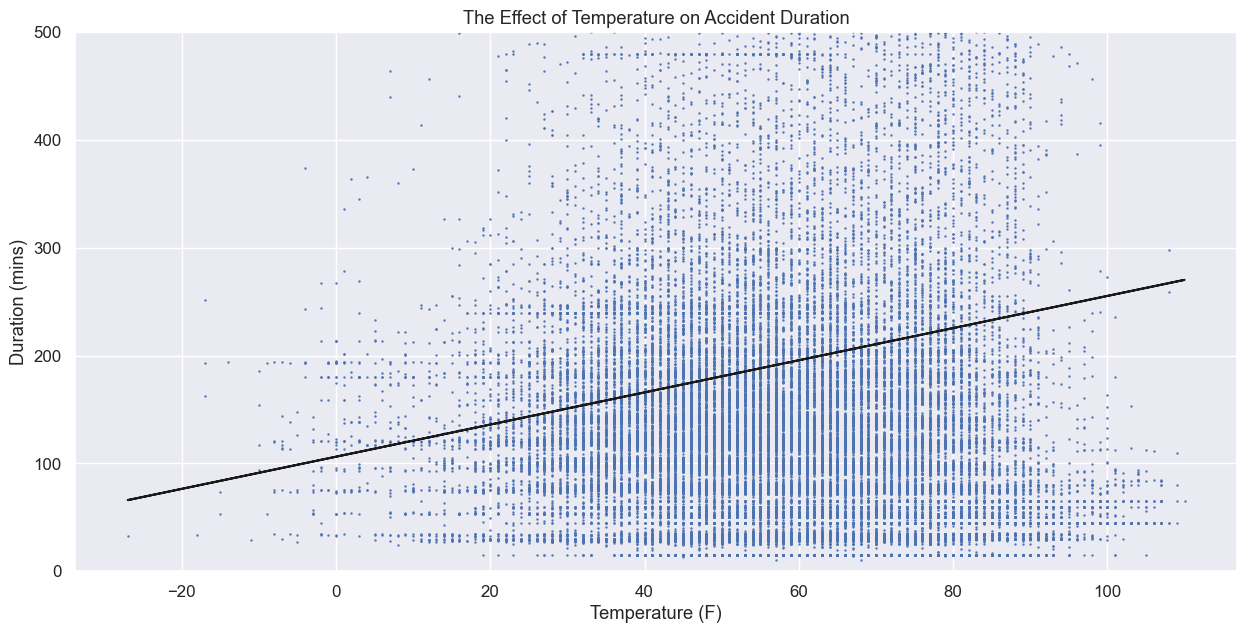

In [67]:
x = df[['Temperature(F)']]
y = df[['Duration']]
linregML(x,y, 'Temperature (F)', 'Duration (mins)', 
         'The Effect of Temperature on Accident Duration')

Regression Score: 0.05664439


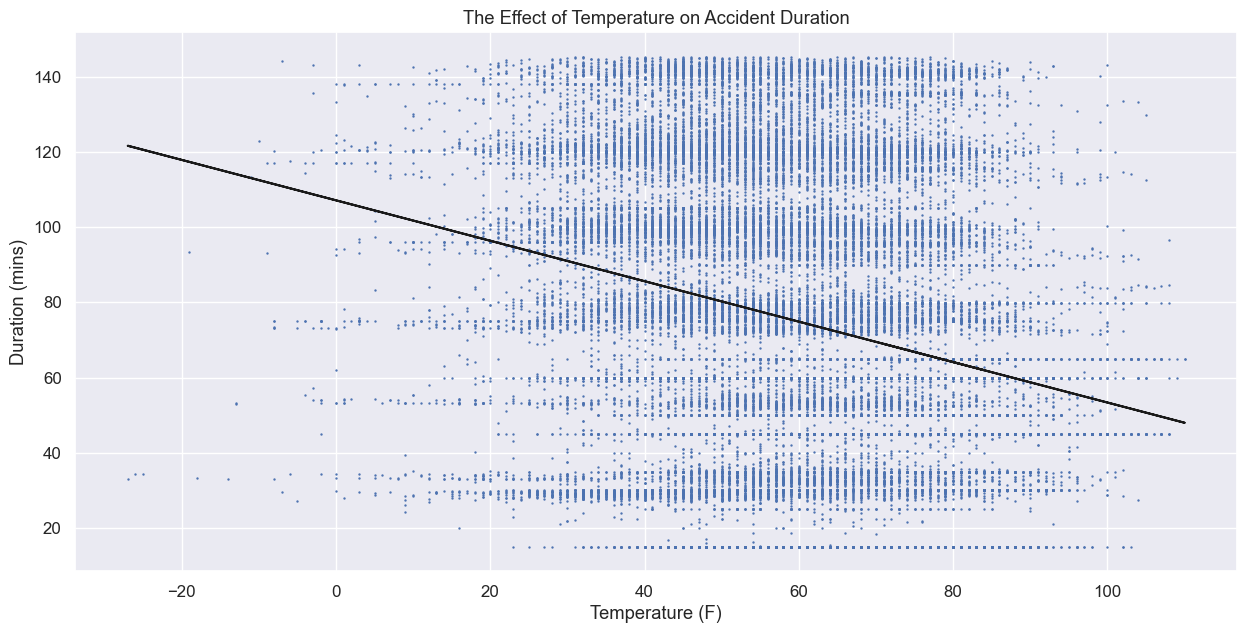

In [68]:
x = df[['Temperature(F)']]
y = df[['Duration']]
RANSAClinregML(x,y, 'Temperature (F)', 'Duration (mins)', 
               'The Effect of Temperature on Accident Duration')

Interestingly, the RANSAC model eliminates the outliers leading to an entirely different regression line with a higher regression score. Keeping the inliers from RANSAC portrayed the actual trend of the data. 

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf = newdf.drop(['Start_Lat', 'End_Hour', 'Start_Hour', 'Start_Lng', 'Duration'], axis=1)
newdf

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
1516659,2,71.0,71.0,81.0,30.03,10.0,10.0,0.00
1638735,2,33.0,33.0,96.0,26.76,8.0,3.0,0.00
1668370,2,53.0,53.0,93.0,29.44,10.0,10.0,0.00
1690279,2,44.0,38.0,89.0,29.74,9.0,12.0,0.00
1707259,2,47.0,43.0,90.0,29.78,4.0,9.0,0.26
...,...,...,...,...,...,...,...,...
2362639,2,43.0,43.0,86.0,29.87,5.0,3.0,0.00
2362640,2,67.0,67.0,15.0,30.16,10.0,5.0,0.00
2362643,2,60.0,60.0,24.0,29.40,10.0,6.0,0.00
2362655,2,62.0,62.0,26.0,30.16,10.0,3.0,0.00


**Random Forest Classifier**

A [Random Forest Classifier Model](https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c#:~:text=The%20Gini%20index%20has%20a,and%20maximum%20purity%20is%200.&text=Now%20that%20we%20have%20understood,to%20how%20they%20do%20prediction.) might work on this data because it is less prone to overfitting and can handle noisy data. It can also take high-dimensional data with many features. In a random forest classifier, the input data is randomly sampled and divided into multiple subsets, and a decision tree is built for each subgroup. When a new data point is introduced, it is passed through each decision tree, and a "vote" is taken to determine the most likely class for the data point. In our case, we use a random forest classifier to [test the importance of the features in our data set.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

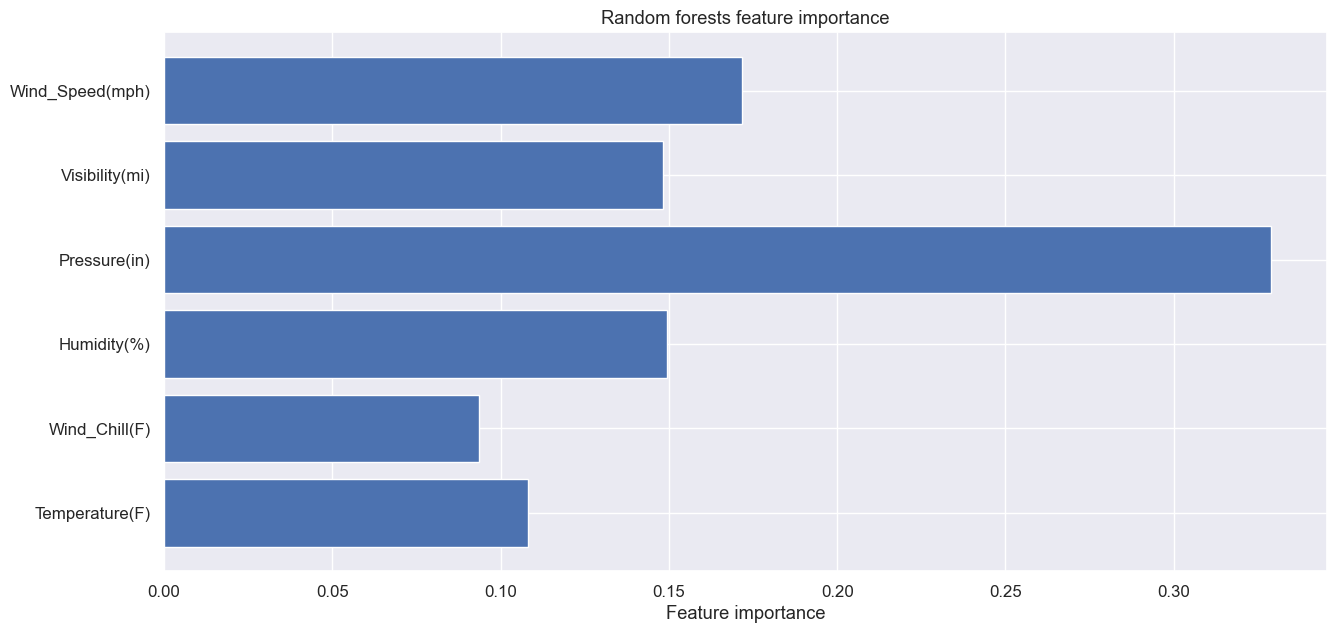

In [ ]:
# get the features and the life expectancy data
X = newdf.values[:, 1:-1]
y = newdf.values[:, -1].astype(int)

# using random forest classification to get feature importances
clf = RandomForestClassifier(n_estimators=100, criterion="gini")
clf = clf.fit(X, y)

# set plot size and labels
plt.figure(figsize=(15, 7))
plt.title('Random forests feature importance')
plt.xlabel('Feature importance')

# create horizontal bar graph with features on the y-axis and the 
# importance of each feature as the width
plt.barh(y=newdf.columns[1:-1], width=clf.feature_importances_)
plt.show()

 Pressure is the best feature to predict the severity of car accidents and wind speed is the second-best predictor. Visibility and humidity are neck and neck in importance score, which is expected since the two variables have a close relationship. Generally, high humidity can reduce visibility due to fog or mist formation, increasing the risk of car accidents. Low visibility makes it difficult to detect hazards, such as other vehicles or obstacles on the road. Wind chill has the lowest score for predictions. Temperature surprised us since we initially thought lower temperatures cause higher severity of accidents since low temperatures can cause snow and icy roads.

***

**<h2 align="center"><font color='1874BD'>Interpretation</font></h2>**

**Conclusions**

-  There is a correlation between visibility and severity of car accidents. The higher severity car accidents tend to happen when there is lower visibility, which makes logical sense. Drivers should avoid going on the road when weather conditions hinder visibility for safer driving. 

-  However, crowdedness may be the ultimate decider of unsafe driving. Most car accidents happen during rush hour, at approximately 9AM and 5PM, due to the high volume of cars on the road at these times. There is another slight peak at 12AM, which may be due to people driving while tired. 

- Our randrom forest model isolated pressure as a primary factor as well. Outside pressure, along with temperature, can have impacts on tire pressure. Drivers should check their tires regularly to avoid flats and optimize their car's performance. Don't ignore the low tire dashboard light!

- Finally, a multitude of factors contribute to dangers on the road and isolating one remains a dubious endeavor. Anyone behind the wheel should remain vigilant at all times for the safety of everyone on our roads. 

**Future Recommendations**

Another indicator of severity could be property damage. Adding these to datasets allows organizations like insurance companies to assess rates based on local environmental factors. In addition, property damage helps better indicate the actual damage to the vehicle rather than just its traffic impact. 

Furthermore, we do not believe "traffic delay" is an apt indicator of severity. The impact on a person's health and life outweighs the exigence of a route delay. Instead, future data should include the effect on a person's health. Medical professionals already measure injury using an injury severity score graded from 1 to 6. Adding something like this to accident reports increases the data's benefit and centralizes the proper themes. 